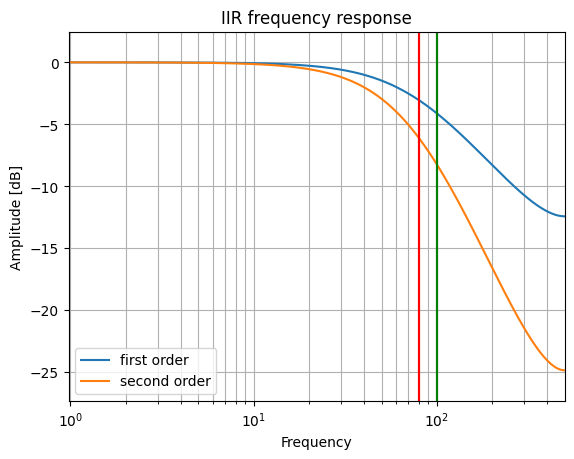

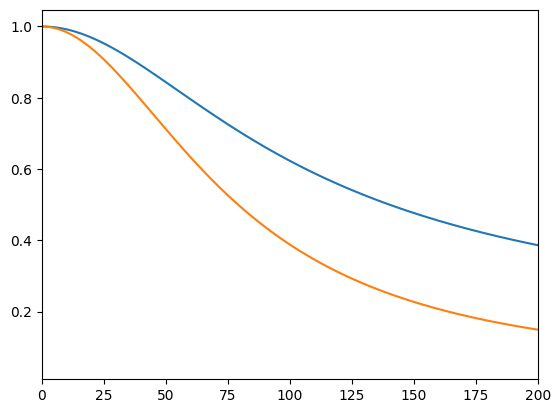

tau = 0.0015915494309189533
[0.14889530583185118]
[1, -1.2282609098099249, 0.3771562156417761]


In [2]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

fs = 1000;
fc = 100;

fp = 80; # pass band freq

# Sampling time
T = 1/fs;

wg = 2*np.pi*fc*T
# Tau
tau = 1/(2*np.pi*fc) #approximation

b0 = T/(T + tau)
a0 = 1
a1 = -tau/(T+tau)

b = [b0    ]
a = [a0, a1]

# Second order
b1 = [b0*b0                ]
a1 = [a0**2, 2*a0*a1, a1**2]

w,h =  signal.freqz(b,a)
w,h1 =  signal.freqz(b1,a1)

f = (w * fs)/ (2 * np.pi) 


plt.semilogx(f, 20 * np.log10(abs(h)), label='first order')
plt.axvline(fc, color='green') # cutoff frequency
plt.axvline(fp, color='red') # drone movement frequency

plt.semilogx(f, 20 * np.log10(abs(h1)), label='second order')
plt.title('IIR frequency response')
plt.xlabel('Frequency')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(fc, color='green') # cutoff frequency
plt.axvline(fp, color='red') # drone movement frequency

plt.legend()
plt.show()

plt.plot(f, abs(h))
plt.xlim([0, fc+100])
plt.grid(which='both', axis='both')

plt.plot(f, abs(h1))
plt.xlim([0, fc+100])
plt.grid(which='both', axis='both')

plt.show()

print(f"tau = {tau}")

print(b1)
print(a1)

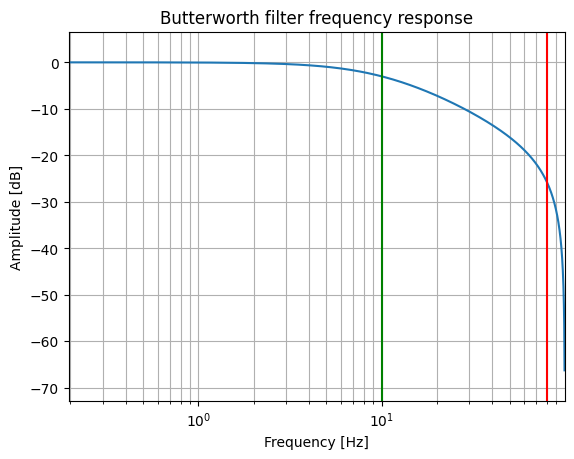

[0.13672874 0.13672874]
[ 1.         -0.72654253]


In [3]:

fs = 200;
fc = 10

b, a = signal.butter(3, fc, fs=fs, btype='low')
w,h =  signal.freqz(b,a)
f = (w * fs)/ (2 * np.pi) 

plt.semilogx(f, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(fc, color='green') # cutoff frequency
plt.axvline(fp, color='red') # drone movement frequency
plt.show()

print(b)
print(a)

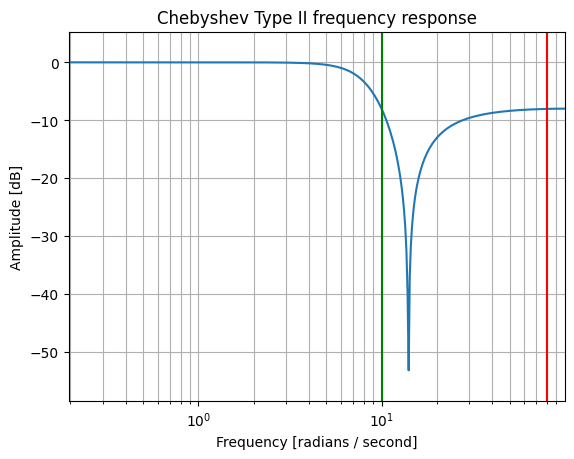

[ 0.35580296 -0.64361289  0.35580296]
[ 1.         -1.66808136  0.7360744 ]


In [4]:
# Cutoff frequency redefinition
#fc = 150

order = 2

b, a = signal.cheby2(order, 8, 2*fc/fs)
w, h = signal.freqz(b, a)
f = (w * fs)/ (2 * np.pi)
               
plt.semilogx(f, 20 * np.log10(abs(h)))
plt.title('Chebyshev Type II frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(fc, color='green') # cutoff frequency
plt.axvline(fp, color='red') # cutoff frequency
plt.show()

print(b)
print(a)

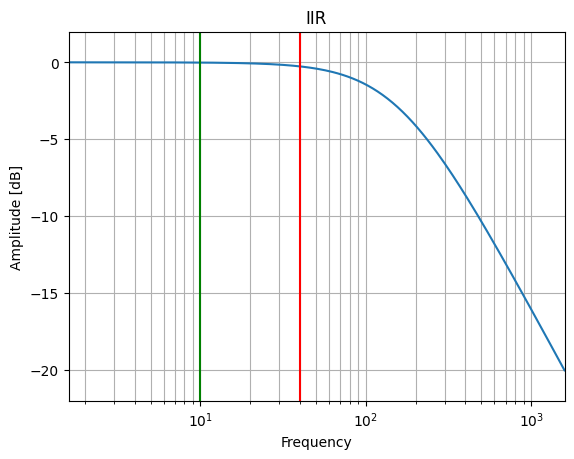

[1]
[1, -0.9999]


In [5]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

fs = 1000;
fc = 10;

fp = 40; # pass band freq

# Sampling time
T = 1/fs;

wg = 2*np.pi*fc*T

c = np.cos(wg)
s = np.sin(wg)

# Tau
#tau = (np.sqrt(-c**2*(s**2-2)) + c)/c**2
#tau = (c - np.sqrt(-c**2*(s**2-2)))/c**2
tau = -0.9999

b0 = 1
a0 = 1
a1 = tau

b = [b0]
a = [a0, a1]

#w,h =  signal.freqz(b,a)
w,h =  signal.freqs(b, a)

f = (w * fs)/ (2 * np.pi)

plt.semilogx(f, 20 * np.log10(abs(h)))
plt.title('IIR')
plt.xlabel('Frequency')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(fc, color='green') # cutoff frequency
plt.axvline(fp, color='red') # cutoff frequency
plt.show()
print(b)
print(a)